<h1>Capstone Project - The Battle of Neighborhoods - Miami</h1>

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem<a name="introduction"></a>

Miami is one of the largest city in Southeast United States and the Miami Metropolitan area is one of the most populated in South Florida. Also known as the Greater Miami Area it comprises of three counties namely Miami-Dade, Broward and Palm Beach. I have been living in Miami for over 10 years now and I haven’t explored the Miami area completely yet. Also over these years I have helped many of my colleagues who moved to Miami area. When people move to a new city they research a lot about the new place, and factors like safety, schools, good neighborhood with most amenities close by etc. play a very important role. An application that can do this exploratory analysis and provide a comparison between neighborhoods would be very beneficial.

The purpose of this project is to explore the Miami-Dade county area, look at the crime rate, population density, list the 10 most common venues across the cities. Additionally we will explore South Florida also known as the Miami Metropolitan area and get a list of India restaurants in this area, which by the way is the most asked question by my colleagues. This project will help Users save a lot of time by providing a lot of initial analysis and recommendations for which they would have to spend hours doing it manually. Also this project uses K-Means clustering unsupervised machine learning algorithm to cluster the venues based on the various categories such as beaches, restaurants, parks etc. This will not only help the user to compare the neighborhoods but also give them more insights to choose one neighborhood over the other.

## Data:<a name="data"></a>

Based on definition of the problem, we would need
1. The list of cities in Miami-Dade county and the Miami Metropolitan Area
2. The most common venues in each of the neighborhood
3. Crime database from last year for the area

We will be using the following data sources and APIs:
<h3>Datasets:-</h3>

1. List of communities in Miami-Dade County, Florida Wikipedia page to get the list of neighborhoods/cities in Miami-Dade County
     +  Once we have the list of the cities in Miami-Dade county we will get their respective coordinates.
     +  Using those coordinates we will cluster the cities and use a Folium visualization to represent them on the map.
     +  Then using the Foursquare API we will get the list of venues nearby to each of the cities and rank them based on the frequency.

2. Miami metropolitan area Wikipedia page to get the data about largest cities in South Florida
     +  From this we will get the list of major neighborhoods/cities in South Florida.
     +  This table also gives the population of the major cities which we will use in a visualization to show the most populated neighborhoods.

3. Florida Crimes database for 2019 from    http://www.fdle.state.fl.us/FSAC/Documents/Excel/2019/FL_Index_Crime_by_Jurisdiction_2019.aspx
     + We will get Total Crime Index and Crime rate per 100,000 population from this table. 
     + We will utilize this data to determine the safest neighborhoods.

<h3>APIs:-</h3>

1. **Foursquare API**
    + This Python visualization library would be used to visualize the neighborhoods cluster distribution of Miami city over an interactive leaflet map.
2. **Folium - Python Visualization Library**
    + This Python visualization library would be used to visualize the neighborhoods cluster distribution of Miami city over an interactive leaflet map.

3. Unsupervised machine learning algorithm **K-mean Clustering** would be applied to form the clusters of different categories of places residing in and around the neighborhoods.

## Methodology:<a name="methodology"></a>

<h3>Data Collection</h3>

<h4>Import Libraries</h4>

In [1]:
from bs4 import BeautifulSoup # For Web scraping to get the table

import pandas as pd # library for data analsysis
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

import geocoder

print('Libraries imported.')

Libraries imported.


<h4>Get the list of Cities in Miami-Dade</h4>

In [2]:
# Use Beautiful Soup to get the table from the Wikiedia page
source_url = requests.get("https://en.wikipedia.org/wiki/List_of_communities_in_Miami-Dade_County,_Florida").text
soup = BeautifulSoup(source_url, 'xml')
table = soup.find('table',{'class':'wikitable sortable'})

In [3]:
# Loop through the table to build the DataFrame
table_rows = table.find_all('tr')
data = []
for row in table_rows:
    td=[]
    for t in row.find_all('td'):
        td.append(t.text.strip())
    data.append(td)
df_md = pd.DataFrame(data, columns=['MapID', 'Community', 'Designation', 'DateIncorporated', 'Population'])

In [4]:
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df_md.loc[len(df_md)] = row_data

In [5]:
df_md.head()

,MapID,Community,Designation,DateIncorporated,Population
0,None,None,None,None,None
1,2,Aventura,City,"November 7, 1995","35,762"
2,7,Bal Harbour,Village,"June 16, 1947","2,513"
3,8,Bay Harbor Islands,Town,April 1947,"5,628"
4,11,Biscayne Park,Village,1933,"3,055"


<h4>Clean up Data</h4>

In [6]:
# Remove rows with null values
df_md = df_md.drop(['MapID'],axis=1)
df_md = df_md[~df_md['Community'].isnull()] 
df_md

,Community,Designation,DateIncorporated,Population
1,Aventura,City,"November 7, 1995","35,762"
2,Bal Harbour,Village,"June 16, 1947","2,513"
3,Bay Harbor Islands,Town,April 1947,"5,628"
4,Biscayne Park,Village,1933,"3,055"
5,Coral Gables,City,1925,"46,780"
6,Cutler Bay,Town,"November 9, 2005","40,286"
7,Doral,City,"June 24, 2003","45,704"
8,El Portal,Village,"December 7, 1937","2,325"
9,Florida City,City,1914,"11,245"
10,Golden Beach,Town,1929,919


<h4>Adding Geographical coordinates to the cities</h4>

In [7]:
col_names = ['City','Population', 'Latitude', 'Longitude']
md_cities = pd.DataFrame(columns=col_names)
md_cities

,City,Population,Latitude,Longitude


In [8]:
lat_lng_coords = None
for index, row in df_md.iterrows():
    city = row['Community']
    pop  = row['Population']
    g = geocoder.arcgis('{},FL'.format(city))
    lat_lng_coords = g.latlng
    md_cities = md_cities.append({ 'City': city,
                                   'Population': pop,
                                   'Latitude': lat_lng_coords[0],
                                   'Longitude': lat_lng_coords[1]}, ignore_index=True)

In [9]:
md_cities

,City,Population,Latitude,Longitude
0,Aventura,"35,762",25.96876,-80.14456
1,Bal Harbour,"2,513",25.88700,-80.12641
2,Bay Harbor Islands,"5,628",25.88771,-80.13131
3,Biscayne Park,"3,055",25.88000,-80.18562
4,Coral Gables,"46,780",25.74923,-80.26295
5,Cutler Bay,"40,286",25.57821,-80.36671
6,Doral,"45,704",25.82147,-80.33198
7,El Portal,"2,325",25.85448,-80.20596
8,Florida City,"11,245",25.44787,-80.48090
9,Golden Beach,919,25.95796,-80.12125


<h4>Folium map of Miami Dade County neighborhood</h4>

In [115]:
map_miamidade = folium.Map(location=[25.771163582, -80.189499242],zoom_start=11)

for lat,lng,city in zip(md_cities['Latitude'],md_cities['Longitude'],md_cities['City']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_miamidade)
map_miamidade

<h2>Foursquare API</h2>

In [11]:
#Define credentials
CLIENT_ID = '14K41UJMSF0RLHX2ZLSOA5D3E2X2AGB5P3VHUZZGVKMMIQLM' # your Foursquare ID
CLIENT_SECRET = '14RTD1TYYLERHAN30SLAVQEFO1E21LGLSXC11N2SY1ISYR1B' # your Foursquare Secret
VERSION = '20200706' # Foursquare API version

In [12]:
#Get geographical coordinates of Miami using geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MiamiDade")
location = geolocator.geocode("Miami,FL")
mi_lat = location.latitude
mi_long = location.longitude
print(location.address)
print('The geograpical coordinates of Miami are {}, {}.'.format(mi_lat, mi_long))

Miami, Miami-Dade County, Florida, United States of America
The geograpical coordinates of Miami are 25.7742658, -80.1936589.


<h4>Get the list of 100 venues using Foursquare API within 5 mile radius</h4>

In [13]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 8047 # define radius approximately within 5 Miles
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    mi_lat, 
    mi_long, 
    radius, 
    LIMIT)

# get the result to a json file
results = requests.get(url).json()

In [14]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [15]:
venues = results['response']['groups'][0]['items']
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.id', 'venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,id,name,categories,lat,lng
0,527ac973498e765bb78dc03f,Le Chat Noir,Wine Bar,25.773893,-80.193620
1,5386767c498ebeec0447eee1,NIU Kitchen,Tapas Restaurant,25.775938,-80.190435
2,4b898f83f964a520c44132e3,HistoryMiami,Museum,25.774827,-80.196559
3,4b69c666f964a52076b32be3,Churchill's Barber Shop,Salon / Barbershop,25.773254,-80.193432
4,515989a3e4b03ece5bbf55a0,Whole Foods Market,Grocery Store,25.772000,-80.189146


In [16]:
#Fucntion to get nearby venues across all the cities/neighborhood
def getNearbyVenues(names, latitudes, longitudes, radius=8047):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
md_venues = getNearbyVenues(names=md_cities['City'],
                          latitudes=md_cities['Latitude'],
                          longitudes=md_cities['Longitude']
                          )

In [18]:
md_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aventura,25.96876,-80.14456,Whole Foods Market,25.971296,-80.141222,Grocery Store
1,Aventura,25.96876,-80.14456,Power Smoothie,25.964466,-80.143703,Restaurant
2,Aventura,25.96876,-80.14456,Barrio Latino,25.965131,-80.144348,Latin American Restaurant
3,Aventura,25.96876,-80.14456,Total Wine & More,25.961352,-80.146097,Wine Shop
4,Aventura,25.96876,-80.14456,Sicilian Oven,25.964936,-80.143824,Italian Restaurant


In [19]:
md_venues.groupby('City').count().head()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Aventura,100,100,100,100,100,100
Bal Harbour,100,100,100,100,100,100
Bay Harbor Islands,100,100,100,100,100,100
Biscayne Park,100,100,100,100,100,100
Coral Gables,100,100,100,100,100,100


In [20]:
print('There are {} unique categories.'.format(len(md_venues['Venue Category'].unique())))

There are 234 unique categories.


<h4>One hot encoding</h4>

In [21]:
# one hot encoding
md_onehot = pd.get_dummies(md_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
md_onehot['City'] = md_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [md_onehot.columns[-1]] + list(md_onehot.columns[:-1])
md_onehot = md_onehot[fixed_columns]

md_onehot.head()

,City,Airport,Airport Lounge,Airport Service,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Business Service,Butcher,Café,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Basketball Court,College Football Field,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Fishing Spot,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Pool,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Laser Tag,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Lighthouse,Lingerie Store,Liquor Store,Lounge,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Nudist Beach,Office,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Racetrack,Radio Station,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Strip Club,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Tourist Information Center,Toy / Game Store,Track,Trail,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Aventura,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Aventura,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [22]:
md_grouped = md_onehot.groupby('City').mean().reset_index()
md_grouped.head()

,City,Airport,Airport Lounge,Airport Service,American Restaurant,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Building,Burger Joint,Business Service,Butcher,Café,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Basketball Court,College Football Field,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Fishing Spot,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Pool,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Laser Tag,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Lighthouse,Lingerie Store,Liquor Store,Lounge,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Nudist Beach,Office,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Racetrack,Radio Station,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Strip Club,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Tourist Information Center,Toy / Game Store,Track,Trail,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Water Park,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Aventura,0.0,0.00,0.0,0.04,0.0,0.0,0.0,0.00,0.0,0.0,0.01,0.00,0.0,0.01,0.00,0.02,0.01,0.00,0.00,0.0,0.04,0.0,0.00,0.0,0.0,0.01,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.02,0.0,0.00,0.01,0.0,0.0,0.0,0.00,0.0,0.01,0.01,0.07,0.00,0.05,0.00,0.0,0.0,0.0,0.0,0.03,0.01,0.00,0.00,0.00,0.03,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.01,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.01,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.01,0.0,0.04,0.0,0.01,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.01,0.0,0.00,0.00,0.0,0.04,0.01,0.01,0.03,0.0,0.0,0.0,0.03,0.00,0.00,0.0,0.02,0.00,0.0,0.0,0.0,0.0,0.01,0.00,0.0,0.0,0.00,0.0,0.0,0.02,0.0,0.00,0.0,0.00,0.0,

In [23]:
md_grouped.shape

(34, 235)

<h4>List the top 5 venues from each city</h4>

In [24]:
num_top_venues = 5

for city in md_grouped['City']:
    print("----"+city+"----")
    temp = md_grouped[md_grouped['City'] == city].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aventura----
                    venue  freq
0          Clothing Store  0.07
1             Coffee Shop  0.05
2                   Beach  0.04
3  Furniture / Home Store  0.04
4           Grocery Store  0.04


----Bal Harbour----
                venue  freq
0               Beach  0.18
1  Italian Restaurant  0.05
2  Seafood Restaurant  0.04
3       Grocery Store  0.04
4               Hotel  0.04


----Bay Harbor Islands----
                venue  freq
0               Beach  0.17
1  Italian Restaurant  0.05
2  Seafood Restaurant  0.04
3              Bakery  0.04
4               Hotel  0.04


----Biscayne Park----
                 venue  freq
0   Italian Restaurant  0.07
1        Grocery Store  0.05
2                Beach  0.03
3   Mexican Restaurant  0.03
4  Japanese Restaurant  0.03


----Coral Gables----
                 venue  freq
0     Cuban Restaurant  0.08
1   Italian Restaurant  0.06
2  American Restaurant  0.05
3        Grocery Store  0.03
4               Bakery  0.03


----Cut

<h4>Get the top 10 common venues</h4>

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
md_venues_sorted = pd.DataFrame(columns=columns)
md_venues_sorted['City'] = md_grouped['City']

for ind in np.arange(md_grouped.shape[0]):
    md_venues_sorted.iloc[ind, 1:] = return_most_common_venues(md_grouped.iloc[ind, :], num_top_venues)

md_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aventura,Clothing Store,Coffee Shop,Italian Restaurant,American Restaurant,Furniture / Home Store,Beach,Grocery Store,Juice Bar,Department Store,Park
1,Bal Harbour,Beach,Italian Restaurant,Grocery Store,Hotel,Seafood Restaurant,Resort,Bakery,Coffee Shop,Peruvian Restaurant,Movie Theater
2,Bay Harbor Islands,Beach,Italian Restaurant,Grocery Store,Bakery,Seafood Restaurant,Hotel,Resort,Coffee Shop,Peruvian Restaurant,Movie Theater
3,Biscayne Park,Italian Restaurant,Grocery Store,Japanese Restaurant,Mexican Restaurant,Park,Beach,Seafood Restaurant,Hotel,Coffee Shop,Bakery
4,Coral Gables,Cuban Restaurant,Italian Restaurant,American Restaurant,Bakery,Grocery Store,Gym / Fitness Center,Park,Steakhouse,Seafood Restaurant,Dog Run


## Analysis:<a name="analysis"></a>

Lets start analyzing the data

<h4>Elbow curve to find the optimum number of Clusters</h4>

In [26]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

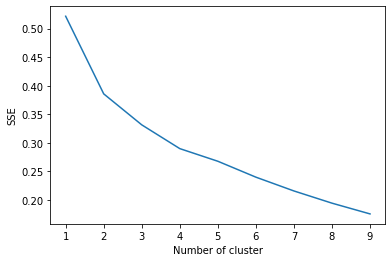

In [27]:
md_grouped_clustering = md_grouped.drop('City', 1)
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(md_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

<h2>Clustering Cities/Neighborhoods</h2>

In [28]:
# set number of clusters
kclusters = 4

md_grouped_clustering = md_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(md_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 0, 2, 2, 2, 2, 2, 1, 3], dtype=int32)

In [29]:
# add clustering labels
md_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

md_merged = md_cities

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
md_merged = md_merged.join(md_venues_sorted.set_index('City'), on='City')

md_merged.head()

,City,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aventura,"35,762",25.96876,-80.14456,3,Clothing Store,Coffee Shop,Italian Restaurant,American Restaurant,Furniture / Home Store,Beach,Grocery Store,Juice Bar,Department Store,Park
1,Bal Harbour,"2,513",25.88700,-80.12641,0,Beach,Italian Restaurant,Grocery Store,Hotel,Seafood Restaurant,Resort,Bakery,Coffee Shop,Peruvian Restaurant,Movie Theater
2,Bay Harbor Islands,"5,628",25.88771,-80.13131,0,Beach,Italian Restaurant,Grocery Store,Bakery,Seafood Restaurant,Hotel,Resort,Coffee Shop,Peruvian Restaurant,Movie Theater
3,Biscayne Park,"3,055",25.88000,-80.18562,2,Italian Restaurant,Grocery Store,Japanese Restaurant,Mexican Restaurant,Park,Beach,Seafood Restaurant,Hotel,Coffee Shop,Bakery
4,Coral Gables,"46,780",25.74923,-80.26295,2,Cuban Restaurant,Italian Restaurant,American Restaurant,Bakery,Grocery Store,Gym / Fitness Center,Park,Steakhouse,Seafood Restaurant,Dog Run


<h4>Folium map to visualize the clustering</h4>

In [30]:
# create map
map_clusters = folium.Map(location=[mi_lat, mi_long], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        md_merged['Latitude'], 
        md_merged['Longitude'], 
        md_merged['City'], 
        md_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h3>Exploring Clusters</h3>

<h5>Cluster 0</h5>

In [31]:
#Cluster 0
md_merged.loc[md_merged['Cluster Labels'] == 0, md_merged.columns[[0] + list(range(5, md_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bal Harbour,Beach,Italian Restaurant,Grocery Store,Hotel,Seafood Restaurant,Resort,Bakery,Coffee Shop,Peruvian Restaurant,Movie Theater
2,Bay Harbor Islands,Beach,Italian Restaurant,Grocery Store,Bakery,Seafood Restaurant,Hotel,Resort,Coffee Shop,Peruvian Restaurant,Movie Theater
14,Key Biscayne,Beach,Aquarium,Park,Italian Restaurant,Argentinian Restaurant,Surf Spot,Seafood Restaurant,Bakery,Bar,Tennis Stadium
17,Miami Beach,Beach,Hotel,Italian Restaurant,Grocery Store,Gym / Fitness Center,American Restaurant,Pizza Place,Park,Cocktail Bar,Bakery
22,North Bay Village,Beach,Italian Restaurant,Hotel,Resort,Coffee Shop,Pizza Place,Art Gallery,Ice Cream Shop,Tapas Restaurant,Café
30,Surfside,Beach,Italian Restaurant,Hotel,Grocery Store,Resort,Coffee Shop,Seafood Restaurant,Peruvian Restaurant,Bakery,Shopping Mall


<h5>Cluster 1</h5>

In [32]:
#Cluster 1
md_merged.loc[md_merged['Cluster Labels'] == 1, md_merged.columns[[0] + list(range(5, md_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Florida City,Mexican Restaurant,Hotel,American Restaurant,Grocery Store,Pharmacy,Pizza Place,Donut Shop,Fast Food Restaurant,BBQ Joint,Breakfast Spot
10,Hialeah,Hotel,Cuban Restaurant,Coffee Shop,Airport Service,Rental Car Location,Mexican Restaurant,Italian Restaurant,Grocery Store,Bakery,Donut Shop
12,Homestead,Mexican Restaurant,American Restaurant,Grocery Store,Pharmacy,Hotel,Pizza Place,Donut Shop,Sandwich Place,Fast Food Restaurant,Convenience Store
15,Medley,Hotel,Grocery Store,Cuban Restaurant,Mexican Restaurant,Coffee Shop,Sushi Restaurant,Italian Restaurant,Department Store,Breakfast Spot,Park
21,Miami Springs,Hotel,Cuban Restaurant,Rental Car Location,Grocery Store,Coffee Shop,Mexican Restaurant,Airport Service,Italian Restaurant,Bakery,Pizza Place
32,Virginia Gardens,Cuban Restaurant,Hotel,Coffee Shop,Grocery Store,Spanish Restaurant,Rental Car Location,Italian Restaurant,Mexican Restaurant,Sushi Restaurant,American Restaurant


<h5>Cluster 2</h5>

In [33]:
#Cluster 2
md_merged.loc[md_merged['Cluster Labels'] == 2, md_merged.columns[[0] + list(range(5, md_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Biscayne Park,Italian Restaurant,Grocery Store,Japanese Restaurant,Mexican Restaurant,Park,Beach,Seafood Restaurant,Hotel,Coffee Shop,Bakery
4,Coral Gables,Cuban Restaurant,Italian Restaurant,American Restaurant,Bakery,Grocery Store,Gym / Fitness Center,Park,Steakhouse,Seafood Restaurant,Dog Run
5,Cutler Bay,Grocery Store,Park,Zoo Exhibit,Burger Joint,Wings Joint,Pharmacy,Seafood Restaurant,Italian Restaurant,Cosmetics Shop,Coffee Shop
6,Doral,Italian Restaurant,Grocery Store,Latin American Restaurant,Hotel,Fast Food Restaurant,Sushi Restaurant,Restaurant,Pharmacy,Cuban Restaurant,Coffee Shop
7,El Portal,Italian Restaurant,Pizza Place,Café,Grocery Store,Park,Coffee Shop,Seafood Restaurant,American Restaurant,Gym,Scenic Lookout
11,Hialeah Gardens,Grocery Store,Pharmacy,Park,Italian Restaurant,Mexican Restaurant,Fast Food Restaurant,Cuban Restaurant,Department Store,Latin American Restaurant,Coffee Shop
16,Miami,Hotel,Seafood Restaurant,Park,Italian Restaurant,Ice Cream Shop,Mexican Restaurant,Art Gallery,Asian Restaurant,Residential Building (Apartment / Condo),Sandwich Place
18,Miami Gardens,Sandwich Place,Fast Food Restaurant,Grocery Store,Caribbean Restaurant,Seafood Restaurant,Coffee Shop,Chinese Restaurant,Park,Bakery,Pizza Place
19,Miami Lakes,Grocery Store,Pharmacy,Italian Restaurant,Ice Cream Shop,Coffee Shop,Mexican Restaurant,Seafood Restaurant,Bakery,Warehouse Store,Cuban Restaurant
20,Miami Shores,Italian Restaurant,Café,Pizza Place,Coffee Shop,Park,Grocery Store,Mexican Restaurant,Caribbean Restaurant,Cuban Restaurant,Diner


<h5>Cluster 3</h5>

In [34]:
#Cluster 3
md_merged.loc[md_merged['Cluster Labels'] == 3, md_merged.columns[[0] + list(range(5, md_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aventura,Clothing Store,Coffee Shop,Italian Restaurant,American Restaurant,Furniture / Home Store,Beach,Grocery Store,Juice Bar,Department Store,Park
9,Golden Beach,Clothing Store,Coffee Shop,American Restaurant,Beach,Furniture / Home Store,Grocery Store,Park,Juice Bar,Department Store,Cosmetics Shop
13,Indian Creek,Resort,Seafood Restaurant,Beach,Breakfast Spot,Grocery Store,Italian Restaurant,Liquor Store,Pizza Place,Restaurant,Hotel
24,North Miami Beach,Coffee Shop,Clothing Store,Grocery Store,Mexican Restaurant,Italian Restaurant,Beach,American Restaurant,Cosmetics Shop,Department Store,Park
27,Pinecrest,Grocery Store,Coffee Shop,American Restaurant,Bakery,Department Store,Clothing Store,Furniture / Home Store,Japanese Restaurant,Shopping Mall,Park
28,South Miami,American Restaurant,Coffee Shop,Clothing Store,Department Store,Italian Restaurant,Bakery,Big Box Store,Japanese Restaurant,Grocery Store,Furniture / Home Store
29,Sunny Isles Beach,Beach,Clothing Store,Coffee Shop,Grocery Store,American Restaurant,Park,Italian Restaurant,Department Store,Resort,Bakery
31,Sweetwater,Clothing Store,Coffee Shop,Cuban Restaurant,Cosmetics Shop,Grocery Store,Burger Joint,Department Store,American Restaurant,Steakhouse,Sushi Restaurant


<h3>Now lets see which cities are the safest in Miami Dade County</h3>

<h5>Get the Florida Crime dataset for 2019</h5>

In [35]:
fname = "/Users/pranaylohkare/Documents/Datasets/FL_Index_Crime_by_Jurisdiction_2019.csv"
df_FL_Crimes = pd.read_csv(
    fname,
    thousands=',', 
    usecols=['County', 'Agency', 'Year', 'Population', 'Total Index Crimes', 'Crime Rate per 100,000 Population'],   # Only load the columns needed
)
df_FL_Crimes.head()

,County,Agency,Year,Population,Total Index Crimes,"Crime Rate per 100,000 Population"
0,01-ALACHUA,Alachua County Sheriff's Office,2019.0,117496.0,2555.0,2174.5
1,01-ALACHUA,Gainesville Police Department,2019.0,133068.0,5640.0,4238.4
2,01-ALACHUA,High Springs Police Department,2019.0,6444.0,180.0,2793.3
3,01-ALACHUA,University of Florida Police Department,2019.0,0.0,318.0,NaN
4,01-ALACHUA,Alachua Police Department,2019.0,10298.0,271.0,2631.6


<h5>Cleaning up the data to get Crime data for Miami Dade County</h5>

In [36]:
#Split County Column to get the County Name only
df_FL_County = df_FL_Crimes['County'].str.split('-', 1, expand=True)
df_FL_County.head()

,0,1
0,01,ALACHUA
1,01,ALACHUA
2,01,ALACHUA
3,01,ALACHUA
4,01,ALACHUA


In [37]:
#Extract City name from the Agency Column
df_FL_City = df_FL_Crimes['Agency'].str.split('Police Department', 1, expand=True)
df_FL_City.head()

,0,1
0,Alachua County Sheriff's Office,None
1,Gainesville,
2,High Springs,
3,University of Florida,
4,Alachua,


In [38]:
df_FL_Crimes = df_FL_Crimes.join(df_FL_City.rename(columns={0:'City',1:'PD'}))
df_FL_Crimes = df_FL_Crimes.join(df_FL_County.rename(columns={0:'CountyID',1:'FL_County'}))
df_FL_Crimes.head()

,County,Agency,Year,Population,Total Index Crimes,"Crime Rate per 100,000 Population",City,PD,CountyID,FL_County
0,01-ALACHUA,Alachua County Sheriff's Office,2019.0,117496.0,2555.0,2174.5,Alachua County Sheriff's Office,None,01,ALACHUA
1,01-ALACHUA,Gainesville Police Department,2019.0,133068.0,5640.0,4238.4,Gainesville,,01,ALACHUA
2,01-ALACHUA,High Springs Police Department,2019.0,6444.0,180.0,2793.3,High Springs,,01,ALACHUA
3,01-ALACHUA,University of Florida Police Department,2019.0,0.0,318.0,NaN,University of Florida,,01,ALACHUA
4,01-ALACHUA,Alachua Police Department,2019.0,10298.0,271.0,2631.6,Alachua,,01,ALACHUA


<h4>Now that we have the the County and City columns we can get the data for Miami-Dade County</h4>

In [39]:
df_MD_Crimes = (df_FL_Crimes.loc[df_FL_Crimes['FL_County'].isin(['MIAMI-DADE'])])
df_MD_Crimes.head()

,County,Agency,Year,Population,Total Index Crimes,"Crime Rate per 100,000 Population",City,PD,CountyID,FL_County
131,13-MIAMI-DADE,Miami-Dade Police Department,2019.0,1212200.0,37175.0,3066.7,Miami-Dade,,13,MIAMI-DADE
132,13-MIAMI-DADE,Bal Harbour Village Police Department,2019.0,2924.0,98.0,3351.6,Bal Harbour Village,,13,MIAMI-DADE
133,13-MIAMI-DADE,Coral Gables Police Department,2019.0,50635.0,1393.0,2751.1,Coral Gables,,13,MIAMI-DADE
134,13-MIAMI-DADE,Florida City Police Department,2019.0,13250.0,1204.0,9086.8,Florida City,,13,MIAMI-DADE
135,13-MIAMI-DADE,Hialeah Police Department,2019.0,239722.0,5396.0,2250.9,Hialeah,,13,MIAMI-DADE


In [40]:
df_MD_Crimes=df_MD_Crimes.drop(['County','CountyID','PD'],axis=1)
df_MD_Crimes=df_MD_Crimes[['FL_County',
                           'City',
                           'Population',
                           'Total Index Crimes',
                           'Crime Rate per 100,000 Population',
                           'Agency',
                           'Year'
                          ]]
df_MD_Crimes.head()

,FL_County,City,Population,Total Index Crimes,"Crime Rate per 100,000 Population",Agency,Year
131,MIAMI-DADE,Miami-Dade,1212200.0,37175.0,3066.7,Miami-Dade Police Department,2019.0
132,MIAMI-DADE,Bal Harbour Village,2924.0,98.0,3351.6,Bal Harbour Village Police Department,2019.0
133,MIAMI-DADE,Coral Gables,50635.0,1393.0,2751.1,Coral Gables Police Department,2019.0
134,MIAMI-DADE,Florida City,13250.0,1204.0,9086.8,Florida City Police Department,2019.0
135,MIAMI-DADE,Hialeah,239722.0,5396.0,2250.9,Hialeah Police Department,2019.0


<h5>Clean up rows with Population numbers as 0.0</h5>

In [41]:
df_MD_Crimes.drop(df_MD_Crimes[df_MD_Crimes.Population == 0.0].index, inplace=True)
df_MD_Crimes.head()

,FL_County,City,Population,Total Index Crimes,"Crime Rate per 100,000 Population",Agency,Year
131,MIAMI-DADE,Miami-Dade,1212200.0,37175.0,3066.7,Miami-Dade Police Department,2019.0
132,MIAMI-DADE,Bal Harbour Village,2924.0,98.0,3351.6,Bal Harbour Village Police Department,2019.0
133,MIAMI-DADE,Coral Gables,50635.0,1393.0,2751.1,Coral Gables Police Department,2019.0
134,MIAMI-DADE,Florida City,13250.0,1204.0,9086.8,Florida City Police Department,2019.0
135,MIAMI-DADE,Hialeah,239722.0,5396.0,2250.9,Hialeah Police Department,2019.0


<h5>Get the Coordinates for generating map data</h5>

In [42]:
md_city_coords = None
md_city_lat = []
md_city_long = []
for index, row in df_MD_Crimes.iterrows():
    city = row['City']
    g = geocoder.arcgis('{},FL'.format(city))
    md_city_coords = g.latlng
    md_city_lat.append(md_city_coords[0])
    md_city_long.append(md_city_coords[1])

df_MD_Crimes['Latitude'] = md_city_lat
df_MD_Crimes['Longitude'] = md_city_long

In [43]:
df_MD_Crimes.head()

,FL_County,City,Population,Total Index Crimes,"Crime Rate per 100,000 Population",Agency,Year,Latitude,Longitude
131,MIAMI-DADE,Miami-Dade,1212200.0,37175.0,3066.7,Miami-Dade Police Department,2019.0,25.614182,-80.567908
132,MIAMI-DADE,Bal Harbour Village,2924.0,98.0,3351.6,Bal Harbour Village Police Department,2019.0,25.893060,-80.123620
133,MIAMI-DADE,Coral Gables,50635.0,1393.0,2751.1,Coral Gables Police Department,2019.0,25.749230,-80.262950
134,MIAMI-DADE,Florida City,13250.0,1204.0,9086.8,Florida City Police Department,2019.0,25.447870,-80.480900
135,MIAMI-DADE,Hialeah,239722.0,5396.0,2250.9,Hialeah Police Department,2019.0,25.826990,-80.281500


<h4>Using Floium heat maps to show population Density</h4>

In [44]:
from folium import plugins
from folium.plugins import HeatMap

md_pop_map = folium.Map(location=[25.771163582, -80.189499242],zoom_start = 10) 
df_MD_Crimes['Latitude'] = df_MD_Crimes['Latitude'].astype(float)
df_MD_Crimes['Longitude'] = df_MD_Crimes['Longitude'].astype(float)
pop_heat_df = df_MD_Crimes[['Latitude','Longitude','Population']]
pop_heat_data = [[row['Latitude'],row['Longitude']] for index, row in pop_heat_df.iterrows()]
# Plot it on the map
HeatMap(pop_heat_data).add_to(md_pop_map)
# Display the map
md_pop_map

<h4>Using Floium heat maps to show Crime Rate</h4>

In [45]:
md_crimes_map = folium.Map(location=[25.82147,-80.33198],zoom_start = 10) 

df_MD_Crimes['Latitude'] = df_MD_Crimes['Latitude'].astype(float)
df_MD_Crimes['Longitude'] = df_MD_Crimes['Longitude'].astype(float)

crimes_heat_df = df_MD_Crimes[['Latitude','Longitude','Total Index Crimes']]

# List comprehension to make out list of lists
crimes_heat_data = [[row['Latitude'],row['Longitude']] for index, row in crimes_heat_df.iterrows()]

# Plot it on the map
HeatMap(crimes_heat_data).add_to(md_crimes_map)

# Display the map
md_crimes_map

<h5>The heat maps show that the crime rate is higher in populated areas. We can also use bar plot to verify that</h5>

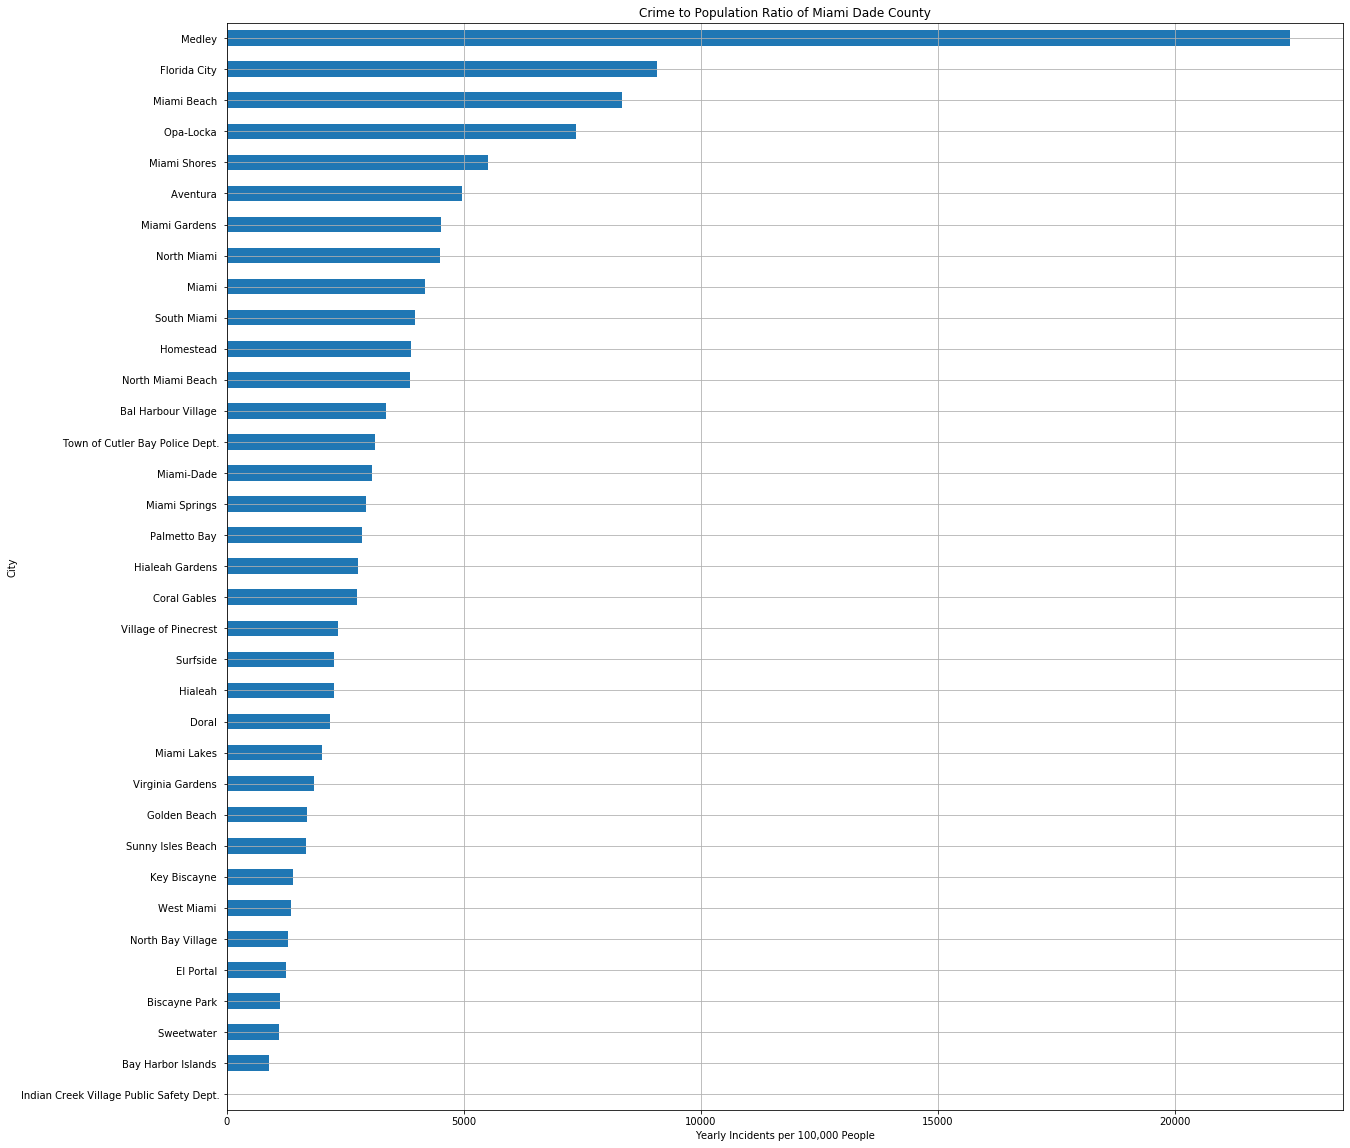

In [46]:
df_MD_Crimes.set_index('City')['Crime Rate per 100,000 Population'].sort_values().plot(kind='barh', grid=True, figsize=(20,20))
plt.xlabel('Yearly Incidents per 100,000 People')
plt.title('Crime to Population Ratio of Miami Dade County')
plt.show()

<h2>Exploring the Miami Metropolitan Area</h2>

In [47]:
from bs4 import BeautifulSoup as bs
url = 'https://en.wikipedia.org/wiki/Miami_metropolitan_area'
r = requests.get(url)
soup_sfl = bs(r.content,'lxml')
table_sfl = soup_sfl.select('table')[2]
sfl_rows = table_sfl.find_all('tr')
output = []
for rows in sfl_rows:
    cols = rows.find_all('td')
    cols = [item.text.strip() for item in cols]
    output.append([item for item in cols if item])
df_sfl = pd.DataFrame(output, columns = ['Rank','City','County','2000_Pop','2010_Pop','2018_Pop','2010-2018 Change'])
df_sfl = df_sfl.iloc[1:]
df_sfl

,Rank,City,County,2000_Pop,2010_Pop,2018_Pop,2010-2018 Change
1,1,Miami,Miami-Dade,"362,470","399,457","470,914",+17.89%
2,2,Hialeah,Miami-Dade,"226,419","224,669","238,942",+6.35%
3,3,Fort Lauderdale,Broward,"152,397","165,521","182,595",+10.32%
4,4,Pembroke Pines,Broward,"137,427","154,750","172,374",+11.39%
5,5,Hollywood,Broward,"139,357","140,768","154,823",+9.98%
6,6,Miramar,Broward,"72,739","122,041","140,823",+15.39%
7,7,Coral Springs,Broward,"117,549","121,096","133,507",+10.25%
8,8,Miami Gardens,Miami-Dade,"100,758","107,167","113,069",+5.51%
9,9,Pompano Beach,Broward,"78,191","99,845","111,954",+12.13%
10,10,West Palm Beach,Palm Beach,"82,103","99,919","111,398",+11.49%


In [48]:
#Convert 2018_Pop column to int type we will work with the 2018 population column as it is the latest
df_sfl['2018_Pop'] = df_sfl['2018_Pop'].str.replace(',', '').astype(int)
df_sfl

,Rank,City,County,2000_Pop,2010_Pop,2018_Pop,2010-2018 Change
1,1,Miami,Miami-Dade,"362,470","399,457",470914,+17.89%
2,2,Hialeah,Miami-Dade,"226,419","224,669",238942,+6.35%
3,3,Fort Lauderdale,Broward,"152,397","165,521",182595,+10.32%
4,4,Pembroke Pines,Broward,"137,427","154,750",172374,+11.39%
5,5,Hollywood,Broward,"139,357","140,768",154823,+9.98%
6,6,Miramar,Broward,"72,739","122,041",140823,+15.39%
7,7,Coral Springs,Broward,"117,549","121,096",133507,+10.25%
8,8,Miami Gardens,Miami-Dade,"100,758","107,167",113069,+5.51%
9,9,Pompano Beach,Broward,"78,191","99,845",111954,+12.13%
10,10,West Palm Beach,Palm Beach,"82,103","99,919",111398,+11.49%


In [49]:
df_sfl_pop = df_sfl.groupby(['County','City'])['2018_Pop'].sum().reset_index()
df_sfl_pop

,County,City,2018_Pop
0,Broward,Coral Springs,133507
1,Broward,Davie,106558
2,Broward,Deerfield Beach,80863
3,Broward,Fort Lauderdale,182595
4,Broward,Hollywood,154823
5,Broward,Lauderhill,72094
6,Broward,Miramar,140823
7,Broward,Pembroke Pines,172374
8,Broward,Plantation,94288
9,Broward,Pompano Beach,111954


In [50]:
df_sfl_tot = df_sfl.groupby(['County'])['2018_Pop'].sum().reset_index()
df_sfl_tot

,County,2018_Pop
0,Broward,1416547
1,Miami-Dade,985120
2,Palm Beach,288692


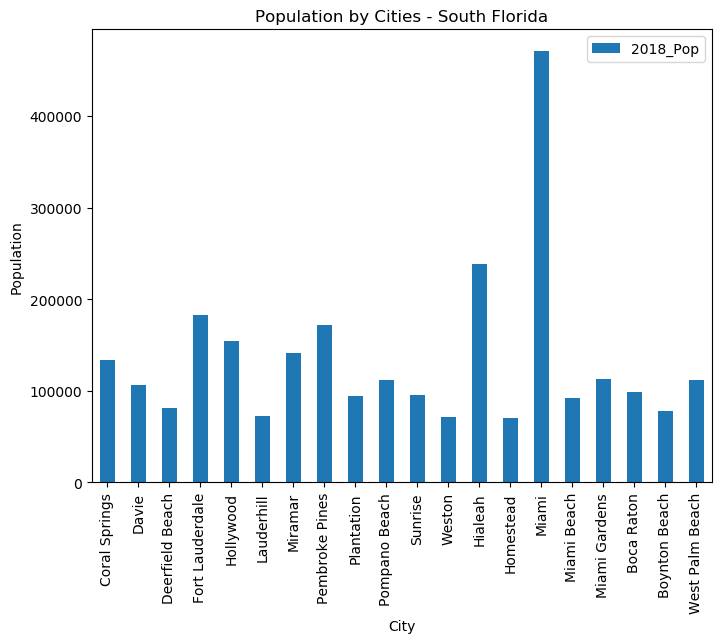

In [51]:
plt.figure(figsize=(8,6), dpi = 100)
plt.title('Population by Cities - South Florida')
plt.xlabel('Cities', fontsize = 10)
plt.ylabel('Population', fontsize=10)
df_sfl_pop.set_index('City')['2018_Pop'].plot(kind='bar')
plt.legend()
plt.show()

<h3>The above bar chart shows the most populated cities in South Florida</h3>

<h4>Get coordinates for largest cities in South Florida</h4>

In [52]:
sfl_city_coords = None
sfl_city_lat = []
sfl_city_long = []
for index, row in df_sfl_pop.iterrows():
    city = row['City']
    g = geocoder.arcgis('{},FL'.format(city))
    sfl_city_coords = g.latlng
    sfl_city_lat.append(sfl_city_coords[0])
    sfl_city_long.append(sfl_city_coords[1])

df_sfl_pop['Latitude'] = sfl_city_lat
df_sfl_pop['Longitude'] = sfl_city_long

In [53]:
df_sfl_pop

,County,City,2018_Pop,Latitude,Longitude
0,Broward,Coral Springs,133507,26.27249,-80.25406
1,Broward,Davie,106558,26.06568,-80.23470
2,Broward,Deerfield Beach,80863,26.32004,-80.09979
3,Broward,Fort Lauderdale,182595,26.12388,-80.14357
4,Broward,Hollywood,154823,26.01067,-80.16026
5,Broward,Lauderhill,72094,26.15387,-80.22340
6,Broward,Miramar,140823,25.98623,-80.30094
7,Broward,Pembroke Pines,172374,26.00811,-80.28011
8,Broward,Plantation,94288,26.12815,-80.24516
9,Broward,Pompano Beach,111954,26.23146,-80.12544


In [88]:
map_sfl = folium.Map(location=[25.771163582, -80.189499242],zoom_start=9)

for lat,lng,city in zip(df_sfl_pop['Latitude'],df_sfl_pop['Longitude'],df_sfl_pop['City']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=10,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_sfl)
map_sfl

In [55]:
def getNearbyIndianRestaurants(names, latitudes, longitudes, radius=8047):
    indRest_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        search_query = "Indian Restaurant"
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            search_query,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        for v in results:
            try:
                 indRest_list.append([(
                 name, 
                 lat, 
                 lng, 
                 v['venue']['id'],
                 v['venue']['name'], 
                 v['venue']['location']['lat'], 
                 v['venue']['location']['lng'],  
                 v['venue']['categories'][0]['name'])])
            except IndexError:
                 pass

    nearby_indRest = pd.DataFrame([item for indRest_list in indRest_list for item in indRest_list])
    nearby_indRest.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue Id',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_indRest)

In [56]:
sfl_ind_rest = getNearbyIndianRestaurants(names=df_sfl_pop['City'],
                                          latitudes=df_sfl_pop['Latitude'],
                                          longitudes=df_sfl_pop['Longitude']
                                          )

In [57]:
sfl_ind_rest.head()

,City,City Latitude,City Longitude,Venue Id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Coral Springs,26.27249,-80.25406,539390cc498ea90b2e501367,arun's indian kitchen,26.272261,-80.263431,Indian Restaurant
1,Coral Springs,26.27249,-80.25406,4bee00bde24d20a19d657214,Khana Kh'zana,26.272923,-80.264172,Indian Restaurant
2,Coral Springs,26.27249,-80.25406,538b531e498e54d858dcb5f9,Taste Buds of India,26.272250,-80.231339,Indian Restaurant
3,Coral Springs,26.27249,-80.25406,4ee92d0bf9ab8fc95db39282,Chutney & Pickle,26.272486,-80.262226,Indian Restaurant
4,Coral Springs,26.27249,-80.25406,58a0ea13dfa6ff7ee6546e21,Bawarchi Biryanis,26.272136,-80.261878,Indian Restaurant


In [58]:
sfl_ind_rest.shape

(200, 8)

There are 200 Indian Restaurants around the lasrgets cities in South Florida/Miami Metropolitan Area

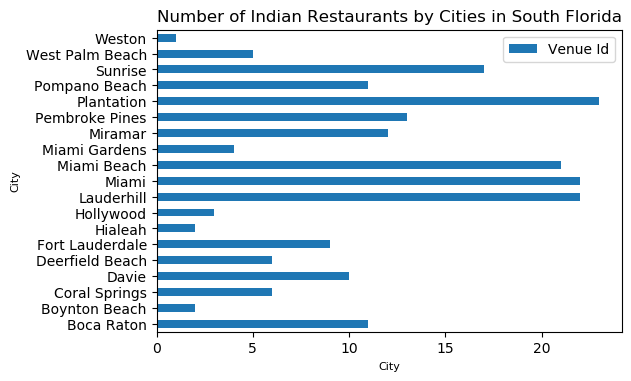

In [117]:
plt.figure(figsize=(6,4), dpi = 100)
plt.title('Number of Indian Restaurants by Cities in South Florida')
plt.xlabel('City', fontsize = 8)
plt.ylabel('No.of Indian Resturants', fontsize=8)
#sfl_ind_rest.groupby('City')['Venue Category'].count().plot(kind='barh')
sfl_ind_rest.groupby('City')['Venue Id'].count().plot(kind='barh')
plt.legend()
plt.show()

<h4>Use Folium map to display the Indian restaurants on the map</h4>

In [116]:
sfl_ind_rest_map = folium.Map(location=[25.771163582, -80.189499242],zoom_start=10)

for lat,lng,venue in zip(sfl_ind_rest['Venue Latitude'],sfl_ind_rest['Venue Longitude'],sfl_ind_rest['Venue']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(sfl_ind_rest_map)
sfl_ind_rest_map

The above map shows that there are plenty of Indian restaurants in the major cities of South Florida.

## Results and Discussion section:<a name="results"></a>

Our exploratory analysis for Miami Dade county and its cities shows that it has a good mix of different types of Venues catering to varied interests of people. Being a tourist destination also may be a reason for this. We were exploring the Miami Dade cities with respect to various amenities, so we divided the cities into clusters. Based on the clusters data we can see that Cluster 0 the most popular venues are the beaches and restaurants. So people who love the beaches and love eating out can choose to live in these cities. Cluster 2 has a good mix of Parks and restaurants. Cluster 3 has lot of shopping options. Additionally we also used the Crime data in these cities to determine the safest cities to live.Results clearly show that cities that are most populated also have high crime rates. The heat maps and the bar plot help to visualize the data. 
The second part of our analysis was to explore the South Florida Area also known as the Miami Metropolitan Area. The analysis mainly focussed Indian restaurants in the largest cities in South Florida. Based on the results we can infer that there are lot of Indian restaurants to choose from in a 5 miles radius from the major cities.
The above analysis will help anyone who wishes to move to the Miami area in their decision to choose a city of their liking.


## Conclusion:<a name="conclusion"></a>

The purpose of the project was to explore the Miami Dade county and the Miami Metropolitan area. In order to aid the users with the exploring we clustered the cities in Miami Dade county to come up with recommendation of cities with better facilities and lesser crime rates.

First we gathered the data of Cities in Miami Dade County from the Wikepedia page and the largest cities data in Miami Metropolitan area from Wikipedia page. We also got the crimes data from the webpage: http://www.fdle.state.fl.us/FSAC/Documents/Excel/2019/FL_Index_Crime_by_Jurisdiction_2019.aspx . Then as part of  Methodology section we did the following :- 
a. Collect and Inspect Data
b. Explore and Understand Data
c. Data preparation and preprocessing
d. Modeling. 

In particular, in the modeling section, we used the k-means clustering technique to cluster the various cities.Then using the Foursquare API first we got the list of 100 venues and then narrowed it down to the top 10 most common venues. Then using the K-means clustering we clustered the neighborhoods to get the most popular venues by the clusters.

Our analysis shows that there are lot of options in each of cities around the Miami area. We can infer from the analysis that cities like Doral and Miami Lakes with plenty of amenities and relatively low crime rate are better options for living if one doesnt want to live in a quite neighborhood. Whereas cities like Sunny isles and Miami Beach are popular among people who want to live near the beach. 

The last part of out analysis helped us to get a list of Indian restaurants in the Miami Metropolitan area. The conclusion we came to is that there are plenty of options available.

With this we can conclude that the anlaysis will help users with the required information.